<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_R/%EC%83%81%EA%B4%80%EB%B6%84%EC%84%9D_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

상관관계 분석, 변수 선택법을 활용한 회귀모형 생성


In [1]:
#install.packages("ISLR")
library(ISLR)
data("Carseats")
car<-Carseats
str(car)  #데이터 구조
head(car)  #데이터 요약
sum(is.na(car))  #결측치(NA)가 존재하는지 확인

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


[1] 0

In [2]:
#Sales와 CompPrice 간의 상관분석
cor(car$Sales,car$CompPrice)  # 피어슨 상관계수 산출
cor.test(car$Sales,car$CompPrice)  # 피어슨 상관계수 검정

[1] 0.06407873


	Pearson's product-moment correlation

data:  car$Sales and car$CompPrice
t = 1.281, df = 398, p-value = 0.2009
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03418779  0.16111814
sample estimates:
       cor 
0.06407873 


In [3]:
#Sales와 Income 간의 상관분석
cor(car$Sales,car$Income) 
cor.test(car$Sales,car$Income) 

[1] 0.151951


	Pearson's product-moment correlation

data:  car$Sales and car$Income
t = 3.067, df = 398, p-value = 0.00231
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05471445 0.24633258
sample estimates:
     cor 
0.151951 


In [4]:
#Sales와 Advertising 간의 상관분석
cor(car$Sales,car$Advertising) 
cor.test(car$Sales,car$Advertising)

[1] 0.2695068


	Pearson's product-moment correlation

data:  car$Sales and car$Advertising
t = 5.5832, df = 398, p-value = 4.378e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1761088 0.3580956
sample estimates:
      cor 
0.2695068 


In [5]:
#Sales와 Population 간의 상관분석
cor(car$Sales,car$Population) 
cor.test(car$Sales,car$Population) 

[1] 0.05047098


	Pearson's product-moment correlation

data:  car$Sales and car$Population
t = 1.0082, df = 398, p-value = 0.314
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04781737  0.14779132
sample estimates:
       cor 
0.05047098 


In [6]:
#Sales와 Price 간의 상관분석
cor(car$Sales,car$Price) 
cor.test(car$Sales,car$Price) 

[1] -0.4449507


	Pearson's product-moment correlation

data:  car$Sales and car$Price
t = -9.912, df = 398, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5203026 -0.3627240
sample estimates:
       cor 
-0.4449507 


In [7]:
#Sales와 Age 간의 상관분석
cor(car$Sales,car$Age) 
cor.test(car$Sales,car$Age) 

[1] -0.2318154


	Pearson's product-moment correlation

data:  car$Sales and car$Age
t = -4.7542, df = 398, p-value = 2.789e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3225359 -0.1368749
sample estimates:
       cor 
-0.2318154 


In [8]:
#Sales와 Education 간의 상관분석
cor(car$Sales,car$Education) 
cor.test(car$Sales,car$Education) 

[1] -0.05195524


	Pearson's product-moment correlation

data:  car$Sales and car$Education
t = -1.0379, df = 398, p-value = 0.2999
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.14924665  0.04633251
sample estimates:
        cor 
-0.05195524 


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.00000000,0.06407873,0.151950979,0.269506781,0.050470984,-0.44495073,-0.231815440,-0.051955242
CompPrice,0.06407873,1.00000000,-0.080653423,-0.024198788,-0.094706516,0.58484777,-0.100238817,0.025197050
Income,0.15195098,-0.08065342,1.000000000,0.058994706,-0.007876994,-0.05669820,-0.004670094,-0.056855422
Advertising,0.26950678,-0.02419879,0.058994706,1.000000000,0.265652145,0.04453687,-0.004557497,-0.033594307
Population,0.05047098,-0.09470652,-0.007876994,0.265652145,1.000000000,-0.01214362,-0.042663355,-0.106378231
Price,-0.44495073,0.58484777,-0.056698202,0.044536874,-0.012143620,1.00000000,-0.102176839,0.011746599
Age,-0.23181544,-0.10023882,-0.004670094,-0.004557497,-0.042663355,-0.10217684,1.000000000,0.006488032
Education,-0.05195524,0.02519705,-0.056855422,-0.033594307,-0.106378231,0.01174660,0.006488032,1.000000000


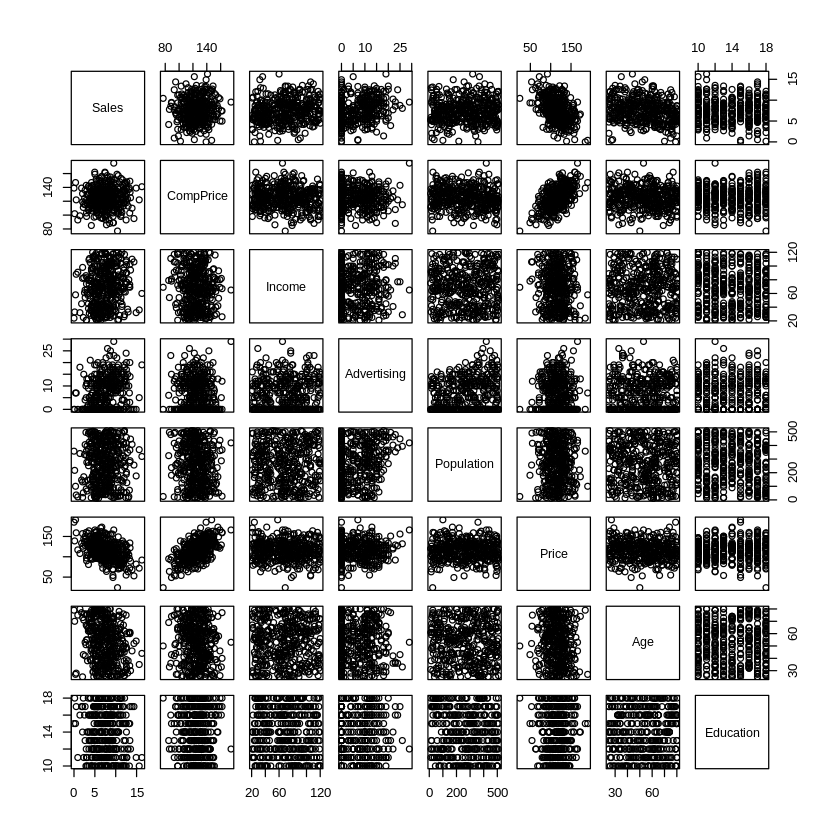

In [9]:
#상관분석 시각화

cor(car[,-c(7,10,11)])
plot(car[,-c(7,10,11)])

변수 선택법을 활용한 회귀모형 생성

In [10]:
# 후진 제거법을 사용하여 회귀분석을 실시하고, 추정된 회귀모형을 생성

step(lm(Sales~CompPrice+Income+Advertising+Population+Price+Age+Education
        ,data=car), direction="backward")

Start:  AIC=533.5
Sales ~ CompPrice + Income + Advertising + Population + Price + 
    Age + Education

              Df Sum of Sq    RSS    AIC
- Population   1      0.12 1458.7 531.53
- Education    1      4.32 1462.9 532.68
<none>                     1458.6 533.50
- Income       1     51.03 1509.6 545.25
- Age          1    208.48 1667.0 584.94
- Advertising  1    278.65 1737.2 601.43
- CompPrice    1    533.98 1992.5 656.28
- Price        1   1247.94 2706.5 778.78

Step:  AIC=531.53
Sales ~ CompPrice + Income + Advertising + Price + Age + Education

              Df Sum of Sq    RSS    AIC
- Education    1      4.21 1462.9 530.68
<none>                     1458.7 531.53
- Income       1     51.29 1510.0 543.35
- Age          1    208.51 1667.2 582.97
- Advertising  1    295.91 1754.6 603.41
- CompPrice    1    540.75 1999.4 655.66
- Price        1   1250.06 2708.7 777.11

Step:  AIC=530.68
Sales ~ CompPrice + Income + Advertising + Price + Age

              Df Sum of Sq    RSS    


Call:
lm(formula = Sales ~ CompPrice + Income + Advertising + Price + 
    Age, data = car)

Coefficients:
(Intercept)    CompPrice       Income  Advertising        Price          Age  
    7.10919      0.09390      0.01309      0.13061     -0.09254     -0.04497  


In [11]:
car.lm <- lm(Sales ~ CompPrice + Income + Advertising + Price + Age, data = car)
summary(car.lm)


Call:
lm(formula = Sales ~ CompPrice + Income + Advertising + Price + 
    Age, data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9071 -1.3081 -0.1892  1.1495  4.6980 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.109190   0.943940   7.531 3.46e-13 ***
CompPrice    0.093904   0.007792  12.051  < 2e-16 ***
Income       0.013092   0.003465   3.779 0.000182 ***
Advertising  0.130611   0.014572   8.963  < 2e-16 ***
Price       -0.092543   0.005044 -18.347  < 2e-16 ***
Age         -0.044971   0.005994  -7.503 4.20e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.927 on 394 degrees of freedom
Multiple R-squared:  0.5403,	Adjusted R-squared:  0.5345 
F-statistic: 92.62 on 5 and 394 DF,  p-value: < 2.2e-16
